<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyupbit

In [598]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-flow", interval="minute30")
df

,open,high,low,close,volume,value
2022-10-22 20:00:00,2090.0,2100.0,2090.0,2095.0,38231.938403,8.005572e+07
2022-10-22 20:30:00,2095.0,2100.0,2090.0,2095.0,61821.391349,1.295301e+08
2022-10-22 21:00:00,2095.0,2100.0,2090.0,2095.0,23558.749594,4.935707e+07
2022-10-22 21:30:00,2095.0,2110.0,2090.0,2110.0,102616.485631,2.157828e+08
2022-10-22 22:00:00,2110.0,2135.0,2100.0,2120.0,234814.886322,4.969874e+08
...,...,...,...,...,...,...
2022-10-26 21:30:00,2315.0,2325.0,2295.0,2320.0,568442.335863,1.313451e+09
2022-10-26 22:00:00,2320.0,2325.0,2290.0,2295.0,250888.939075,5.780605e+08
2022-10-26 22:30:00,2295.0,2320.0,2285.0,2310.0,420688.126080,9.697235e+08
2022-10-26 23:00:00,2310.0,2325.0,2285.0,2295.0,402149.595406,9.267584e+08


In [599]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-10-22 20:00:00,2095.0
1,2022-10-22 20:30:00,2095.0
2,2022-10-22 21:00:00,2095.0
3,2022-10-22 21:30:00,2110.0
4,2022-10-22 22:00:00,2120.0
...,...,...
195,2022-10-26 21:30:00,2320.0
196,2022-10-26 22:00:00,2295.0
197,2022-10-26 22:30:00,2310.0
198,2022-10-26 23:00:00,2295.0


In [600]:
#prophet 불러옴
from fbprophet import Prophet

In [601]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [602]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

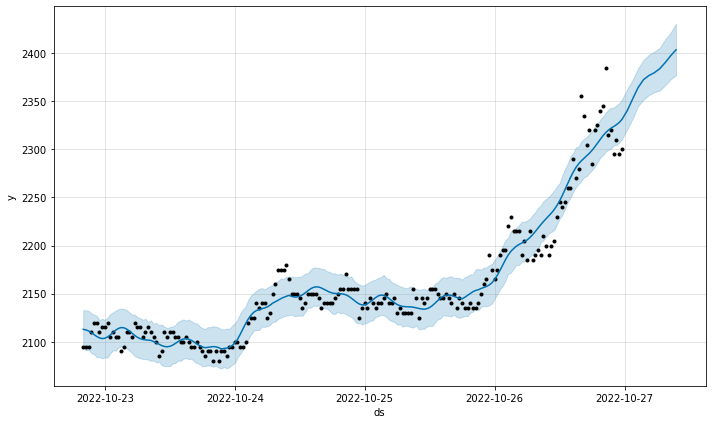

In [603]:
#그래프1
fig1 = model.plot(forecast)

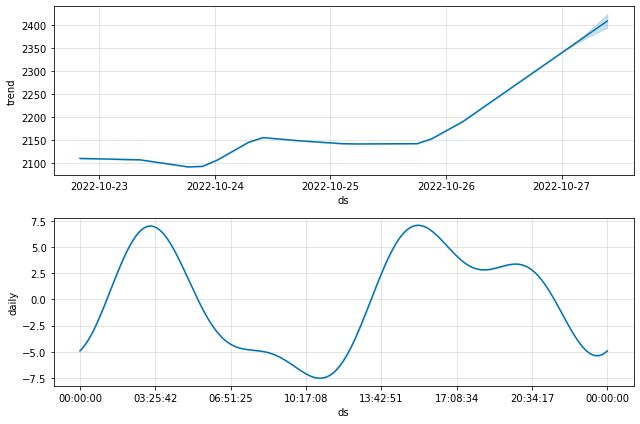

In [604]:
 #그래프2
fig2 = model.plot_components(forecast)